# In this notebook I use scrublet on the AMP data


In [1]:
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import pyreadr

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
counts_matrix = scipy.sparse.coo_matrix.transpose(scipy.io.mmread("mm_save_raw_counts.mm"))
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))


Counts matrix shape: 403596 rows, 33538 columns


In [ ]:
print('Counts matrix shape: {} rows, {} columns'.format(test.shape[0], test.shape[1]))
counts_matrix = scipy.sparse.coo_matrix.transpose(test)
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))


In [ ]:
counts_matrix = np.matrix.transpose(np.load('/data/srlab/fzhang/amp/results/2020_04_06_human_derived_macrophage_HTO/mRNA_exp_raw_qc.npy'))
print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))


In [4]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.15)

In [6]:
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.66
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 8.7%
Overall doublet rate:
	Expected   = 15.0%
	Estimated  = 4.5%
Elapsed time: 3532.8 seconds


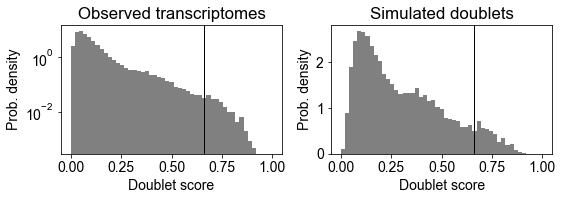

In [7]:
scrub.plot_histogram();

In [8]:

print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

Running UMAP...
Running tSNE...
Running ForceAtlas2...
Done.


/PHShome/jn467/miniconda3/lib/python3.7/site-packages/scrublet/scrublet.py:550: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  cmap=cmap_use, vmin=vmin, vmax=vmax)
/PHShome/jn467/miniconda3/lib/python3.7/site-packages/scrublet/scrublet.py:562: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x[o], y[o], s=marker_size, edgecolors='', c=called_doubs[o], cmap=custom_cmap([[.7,.7,.7], [0,0,0]]))


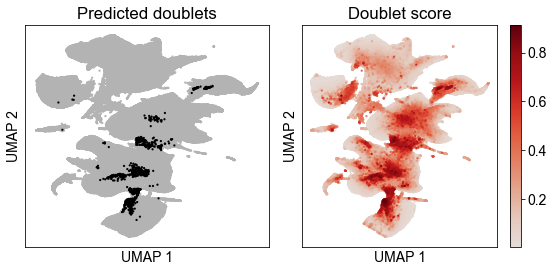

In [9]:
scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [10]:
doublet_scores

array([0.05211341, 0.15100433, 0.0505997 , ..., 0.08425414, 0.08393175,
       0.11093502])

In [ ]:
os. getcwd()
os.chdir("/data/srlab1/jmears/jupyter/2020-01-14-Tanya-new/")
os. getcwd()


In [11]:
np.save("doublet_scores_amp_all.npy", doublet_scores)

In [19]:
run = "BRI-192"
str(run) + "_raw_counts.mm"


'BRI-192_raw_counts.mm'